In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime
import geopandas as gp
import pylab as pl
import matplotlib
matplotlib.style.use('seaborn-darkgrid')
pl.rcParams['figure.figsize']=(12,8)
pl.rcParams['font.size']= 13
%matplotlib inline

In [2]:
matplotlib.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

# Data has 311 reported homeless people for complaint type - Homeless encampment as well as homeless people reach, can the data be duplicate in both entries, our assumption is that its not!!

In [3]:
homeless2016 = pd.read_csv("../Data_vys217/DHS/311_Service_Requests/311_Service_Requests_from_2016.csv",
                            usecols=['Created Date', 'Complaint Type',
                                     'Latitude', 'Longitude'])

In [4]:
homeless2015 = pd.read_csv("../Data_vys217/DHS/311_Service_Requests/311_Service_Requests_from_2015_nyc_filter.csv",
                            usecols=['Created Date', 'Complaint Type',
                                     'Latitude', 'Longitude'])

In [5]:
homeless = pd.read_csv("../Data_vys217/DHS/311_Service_Requests/311_Homeless_2013_2016.csv",
                            usecols=[ 'Created Date', 'Complaint Type',
                                     'Latitude', 'Longitude'])

# Homeless Shelter

In [6]:
coh_shelter = pd.read_excel("../Data_vys217/DHS/NYCHomelessShelterPopulation-Worksheet1983-Present_Oct2016.xlsx")
coh_shelter['Time'] = pd.to_datetime(coh_shelter['Time'])
# homeless_shelter.dropna(inplace= True)

In [7]:
coh_shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
Time                                            406 non-null datetime64[ns]
Total Population                                382 non-null float64
Total Families                                  396 non-null float64
Total Persons in Families                       382 non-null float64
Children                                        382 non-null float64
Adults in Families                              382 non-null float64
Single Adults                                   406 non-null int64
Single Men                                      406 non-null int64
Single Women                                    406 non-null int64
Average Shelter Stays for Families (in Days)    379 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 31.8 KB


In [8]:
for i in range(len(coh_shelter)):
    if i == 0: coh_shelter.loc[i,'change'] = 0
    else:
        coh_shelter.loc[i,'change'] = ((coh_shelter.loc[i,'Total Population'] - coh_shelter.loc[i-1,'Total Population'])*100.0)/  coh_shelter.loc[i-1,'Total Population']

In [9]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
monthsFmt = DateFormatter('%m')

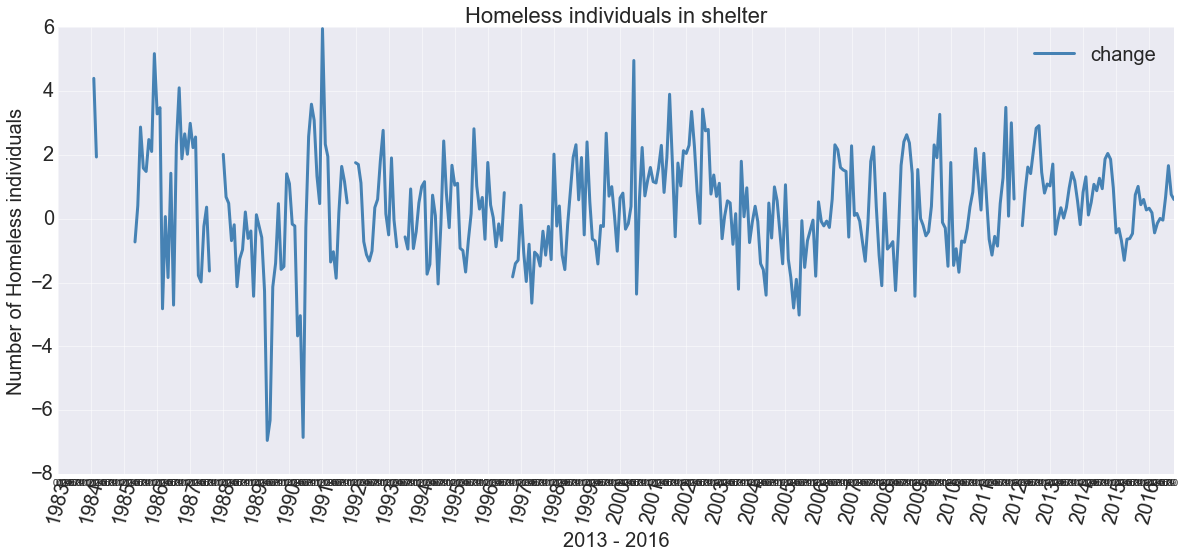

In [10]:
fig = pl.figure(figsize=(20,8))
ax = fig.gca()
ax.plot(coh_shelter.iloc[:,0], coh_shelter.loc[:,'change'], 
        '-',ms = 10, color="SteelBlue", lw = 3)
pl.xticks(rotation=75, fontsize=20)
pl.yticks(fontsize=20)
# pl.grid()
pl.legend(loc = 'best', fontsize=20)
pl.xlabel("2013 - 2016", fontsize=20)
pl.ylabel("Number of Homeless individuals", fontsize=20)
pl.title('Homeless individuals in shelter', 
         fontsize=22)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
# pl.autoscale_view()

# pl.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
#         [thresholds[1], thresholds[1]], color='k')

# pl.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
#         [thresholds[0], thresholds[0]], color='k')

In [11]:
coh_yearly = coh_shelter.groupby(coh_shelter['Time'].map(lambda x: x.year)).first()

In [12]:
coh_yearly.tail(5)

,Time,Total Population,Total Families,Total Persons in Families,Children,Adults in Families,Single Adults,Single Men,Single Women,Average Shelter Stays for Families (in Days),change
Time,,,,,,,,,,,
2012,2012-01-01,42805.0,10289.0,32760.0,17162.0,15598.0,9955,7419,2536,346.0,-0.217264
2013,2013-01-01,50135.0,11984.0,39295.0,21034.0,18261.0,10840,8082,2758,375.0,1.031780
2014,2014-01-01,53615.0,12724.0,42263.0,22712.0,19551.0,11352,8470,2882,435.0,0.831249
2015,2015-01-01,60670.0,14524.0,47958.0,25459.0,22499.0,12712,9425,3287,432.0,-0.441425
2016,2016-01-01,60296.0,14670.0,46149.0,23882.0,22267.0,14147,10399,3748,434.0,0.332801


In [14]:
coh_timeseries = coh_shelter.iloc[:,:2]

In [15]:
coh_timeseries.index = coh_timeseries['Time']

In [16]:
coh_timeseries.drop(['Time'], axis=1, inplace=True)

In [17]:
coh_timeseries=coh_timeseries.resample('M').mean()
coh_timeseries.interpolate(inplace=True)

C:\Users\Vishwajeet\Anaconda2\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


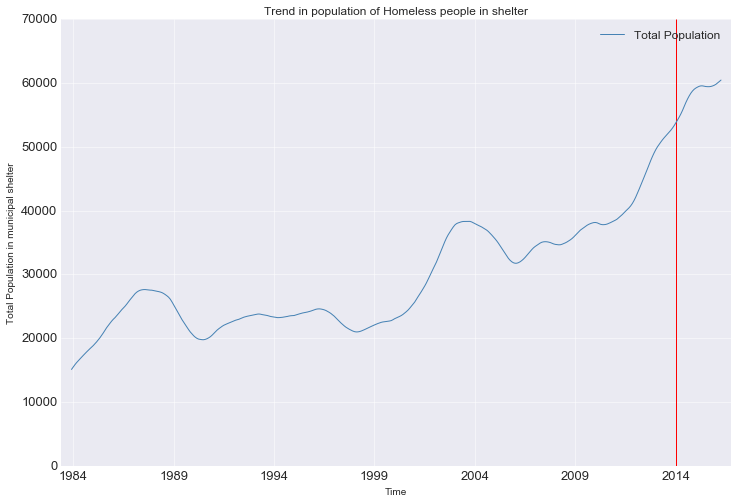

In [18]:
res = sm.tsa.seasonal_decompose(coh_timeseries.dropna())
res.trend.plot(figsize=(12,8), fontsize= 13, color = 'steelblue')
pl.ylabel('Total Population in municipal shelter')
pl.title('Trend in population of Homeless people in shelter')
pl.legend(loc='best')
pl.vlines(datetime.date(2014,1,1), 0, 70000,color="red")


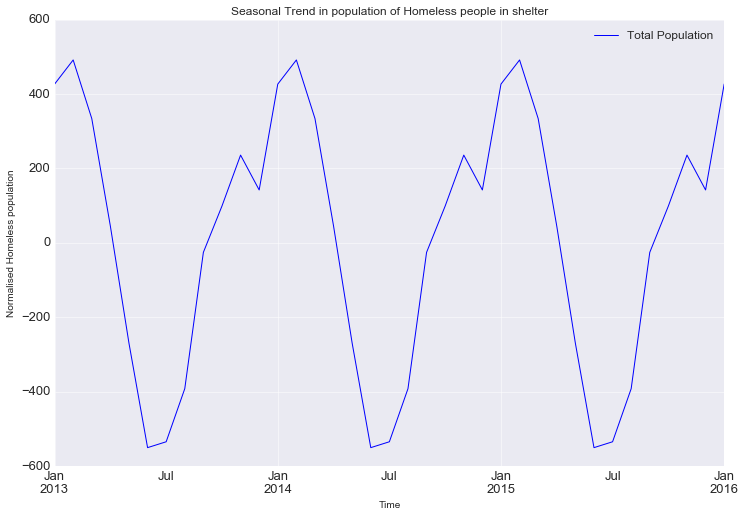

In [19]:
res = sm.tsa.seasonal_decompose(coh_timeseries.dropna())
res.seasonal.plot(figsize=(12,8), fontsize= 13, label = 'Normalised total population')
pl.ylabel('Total Population')
pl.title('Seasonal Trend in population of Homeless people in shelter')
pl.xlim('2013','2016')
pl.ylabel('Normalised Homeless population')
pl.legend()

In [20]:
homeless_shelter = pd.read_csv("../Data_vys217/DHS/DHS_Daily_Report.csv")
homeless_shelter['Date of Census'] = pd.to_datetime(homeless_shelter['Date of Census'])
homeless_shelter.dropna(inplace= True)

In [21]:
homeless_shelter.drop_duplicates(inplace= True)

In [22]:
homeless_shelter.columns

Index([u'Date of Census', u'Total Adults in Shelter',
       u'Total Children in Shelter', u'Total Individuals in Shelter',
       u'Single Adult Men in Shelter', u'Single Adult Women in Shelter',
       u'Total Single Adults in Shelter', u'Families with Children in Shelter',
       u'Adults in Families with Children in Shelter',
       u'Children in Families with Children in Shelter',
       u'Total Individuals in Families with Children in Shelter ',
       u'Adult Families in Shelter',
       u'Individuals in Adult Families in Shelter'],
      dtype='object')

In [23]:
homeless_shelter.loc[:,'Families'] = homeless_shelter['Adult Families in Shelter'] + homeless_shelter['Families with Children in Shelter']

In [24]:
homeless_shelter['Date of Census'].describe()

count                    1159
unique                   1159
top       2015-07-19 00:00:00
freq                        1
first     2013-08-21 00:00:00
last      2016-11-29 00:00:00
Name: Date of Census, dtype: object

In [25]:
print ("Mean individuals per day {:.2f}".format(coh_shelter['Total Population'].mean()))
print ("Stdev individuals per day {:.2f}".format(coh_shelter['Total Population'].std()))
thresholds = [coh_shelter['Total Population'].mean() + 2 * coh_shelter['Total Population'].std(), 
              coh_shelter['Total Population'].mean() - 2 * coh_shelter['Total Population'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))

Mean individuals per day 31990.19
Stdev individuals per day 11666.18
3-sigma thresholds 55322.55 8657.84


In [26]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
monthsFmt = DateFormatter('%m')

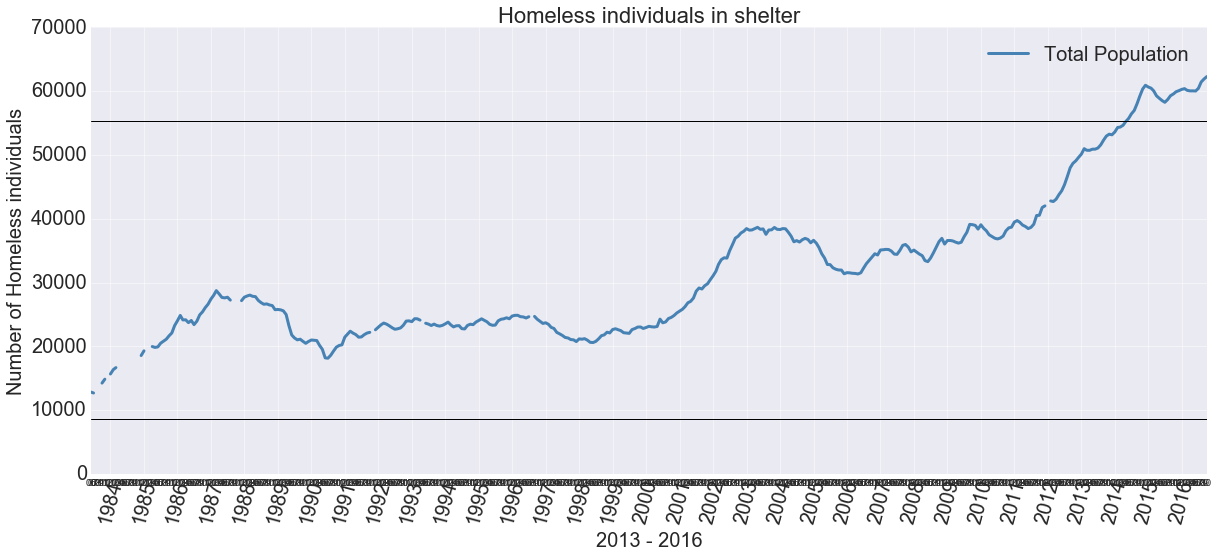

In [27]:
fig = pl.figure(figsize=(20,8))
ax = fig.gca()
ax.plot(coh_shelter.iloc[:,0], coh_shelter.loc[:,'Total Population'], 
        '-',ms = 10, color="SteelBlue", lw = 3)
pl.xticks(rotation=75, fontsize=20)
pl.yticks(fontsize=20)
# pl.grid()
pl.legend(loc = 'best', fontsize=20)
pl.xlabel("2013 - 2016", fontsize=20)
pl.ylabel("Number of Homeless individuals", fontsize=20)
pl.title('Homeless individuals in shelter', 
         fontsize=22)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
# pl.autoscale_view()

pl.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
        [thresholds[1], thresholds[1]], color='k')

pl.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
        [thresholds[0], thresholds[0]], color='k')

In [28]:
coh_shelter

,Time,Total Population,Total Families,Total Persons in Families,Children,Adults in Families,Single Adults,Single Men,Single Women,Average Shelter Stays for Families (in Days),change
0,1983-01-01,NaN,NaN,NaN,NaN,NaN,4509,3975,534,NaN,0.000000
1,1983-02-01,NaN,1520.0,NaN,NaN,NaN,4850,4274,576,NaN,NaN
2,1983-03-01,NaN,1655.0,NaN,NaN,NaN,4991,4413,578,NaN,NaN
3,1983-04-01,NaN,1761.0,NaN,NaN,NaN,5123,4543,580,NaN,NaN
4,1983-05-01,NaN,1839.0,NaN,NaN,NaN,5080,4489,591,NaN,NaN
5,1983-06-01,12830.0,2042.0,7954.0,5367.0,2587.0,4876,4277,599,165.0,NaN
6,1983-07-01,12687.0,2042.0,7954.0,5367.0,2587.0,4733,4118,615,162.0,-1.114575
7,1983-08-01,NaN,NaN,NaN,NaN,NaN,4707,4083,624,NaN,NaN
8,1983-09-01,NaN,2094.0,NaN,NaN,NaN,4963,4319,644,NaN,NaN
9,1983-10-01,14238.0,2205.0,8820.0,5951.0,2869.0,5418,4747,671,192.0,NaN


In [29]:
coh_shelter.dropna(inplace=True)

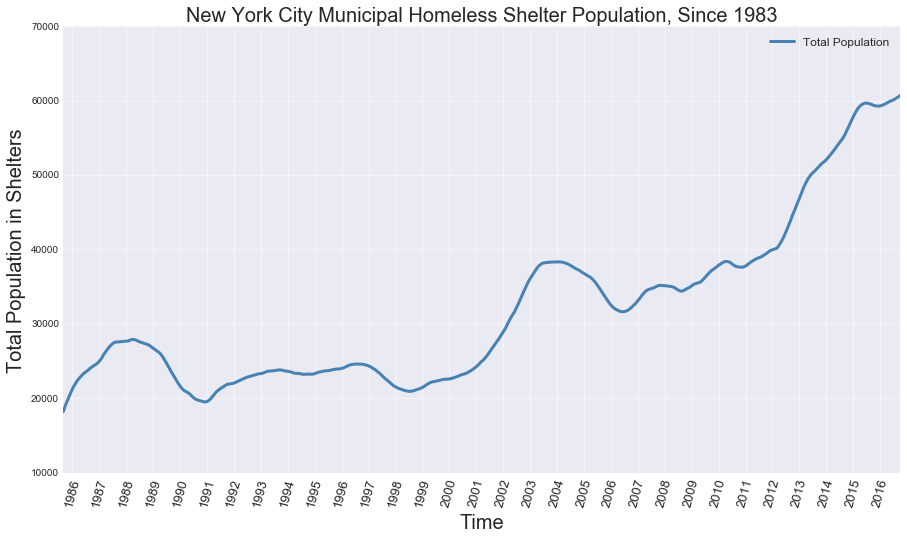

In [30]:
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.plot(coh_shelter.iloc[:,0], coh_shelter.loc[:,'Total Population'].rolling(window = 10).mean(), 
        '-',ms = 10, color="SteelBlue", lw = 3)
pl.xlabel('Time', fontsize=20)
pl.ylabel('Total Population in Shelters', fontsize=20)
pl.title("New York City Municipal Homeless Shelter Population, Since 1983", fontsize=20)

pl.xticks(rotation=75, fontsize=13)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
# ax.xaxis.set_minor_formatter(monthsFmt)
pl.legend(loc='best')

# Homeless 311 continued

In [31]:
# homeless2016['Created Date'] = pd.to_datetime(homeless2016['Created Date'])
# homeless2015['Created Date'] = pd.to_datetime(homeless2015['Created Date'])
homeless['Created Date'] = pd.to_datetime(homeless['Created Date'])

In [32]:
for i in range(len(homeless)):
     homeless.loc[i, 'date'] = homeless['Created Date'][i].date()

In [33]:
homeless.head()

,Created Date,Complaint Type,Latitude,Longitude,date
0,2016-08-24 10:52:00,Homeless Person Assistance,40.769157,-73.982429,2016-08-24
1,2016-08-25 08:36:59,Homeless Person Assistance,40.728159,-73.982956,2016-08-25
2,2016-08-25 10:19:22,Homeless Person Assistance,40.735738,-73.987504,2016-08-25
3,2016-08-25 11:39:42,Homeless Person Assistance,40.787109,-73.975448,2016-08-25
4,2016-08-25 08:36:26,Homeless Person Assistance,NaN,NaN,2016-08-25


In [34]:
homeless.date.describe()

count          67183
unique          1418
top       2016-06-29
freq             274
Name: date, dtype: object

In [35]:
homless_timeseries = homeless.groupby('date').count()

In [36]:
homless_timeseries

,Created Date,Complaint Type,Latitude,Longitude
date,,,,
2013-01-01,4,4,4,4
2013-01-02,3,3,3,3
2013-01-03,6,6,6,6
2013-01-04,2,2,2,2
2013-01-05,4,4,4,4
2013-01-06,3,3,3,3
2013-01-07,7,7,7,7
2013-01-08,6,6,6,6
2013-01-09,14,14,14,14


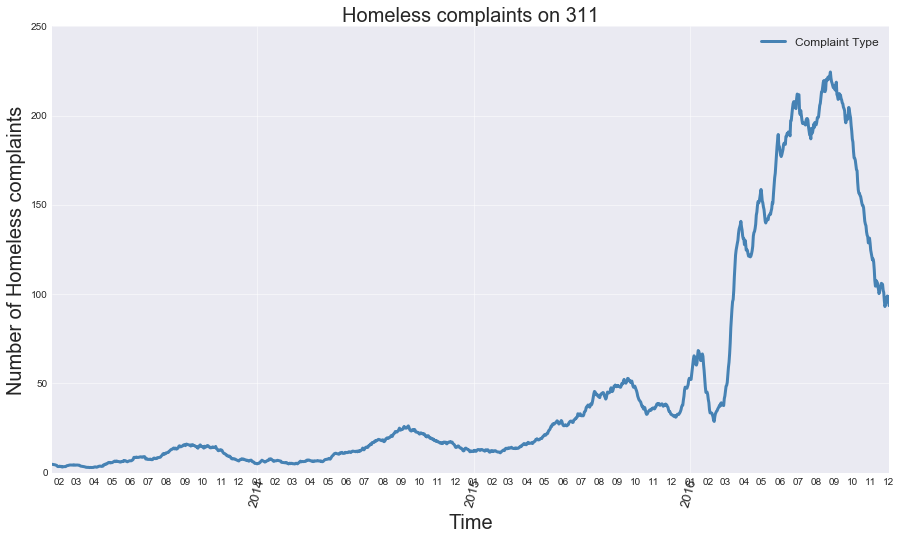

In [37]:
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.plot(homless_timeseries.index, homless_timeseries.iloc[:,1].rolling(window = 20).mean(), 
        '-',ms = 10, color="SteelBlue", lw = 3)
pl.xlabel('Time', fontsize=20)
pl.ylabel('Number of Homeless complaints', fontsize=20)
pl.title("Homeless complaints on 311", fontsize=20)

pl.xticks(rotation=75, fontsize=13)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
pl.legend(loc='best')

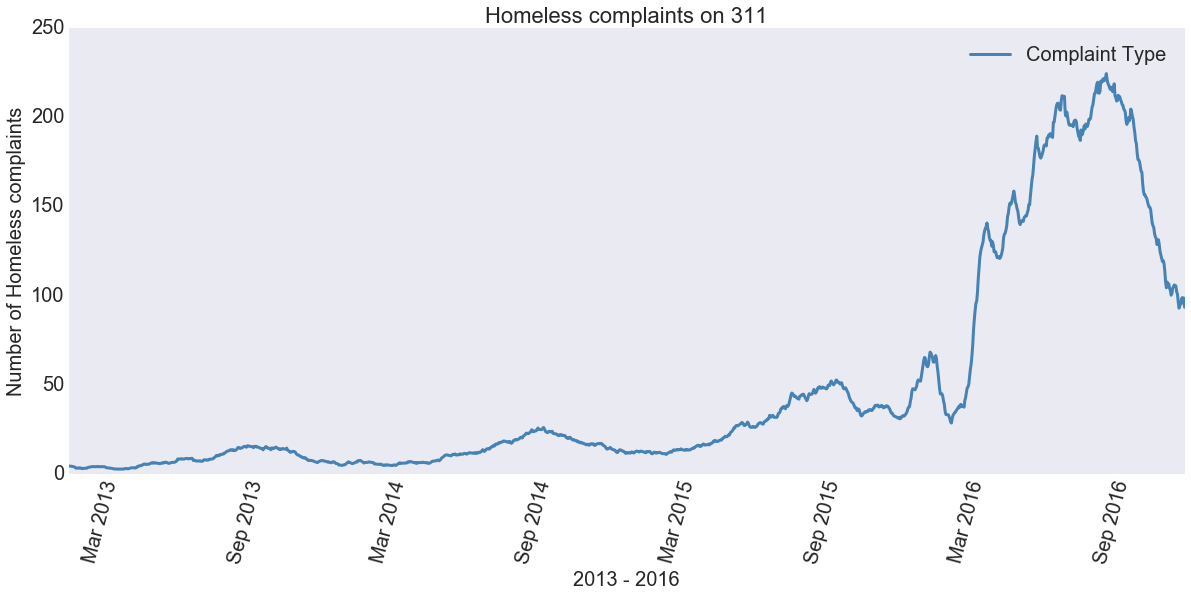

In [38]:
fig = pl.figure(figsize=(20,8))
ax = fig.gca()
ax.plot(homless_timeseries.index, homless_timeseries.iloc[:,1].rolling(window = 20).mean(), 
        '-',ms = 10, color="SteelBlue", lw = 3)
pl.xticks(rotation=75, fontsize=20)
pl.yticks(fontsize=20)
pl.grid()
pl.legend(loc = 'best', fontsize=20)
pl.xlabel("2013 - 2016", fontsize=20)
pl.ylabel("Number of Homeless complaints", fontsize=20)
pl.title('Homeless complaints on 311', 
         fontsize=22)

# pl.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
#         [thresholds[1]/1000, thresholds[1]/1000], color='k')

In [39]:
homeless311_timerseries =homless_timeseries.iloc[:,:1]

In [40]:
homeless311_timerseries.columns = ['Number of Homeless Complaints']

In [41]:
homeless311_timerseries.index = homeless311_timerseries.index.to_datetime()

In [42]:
homeless311_timerseries=homeless311_timerseries.resample('M').mean()
homeless311_timerseries.interpolate(inplace=True)

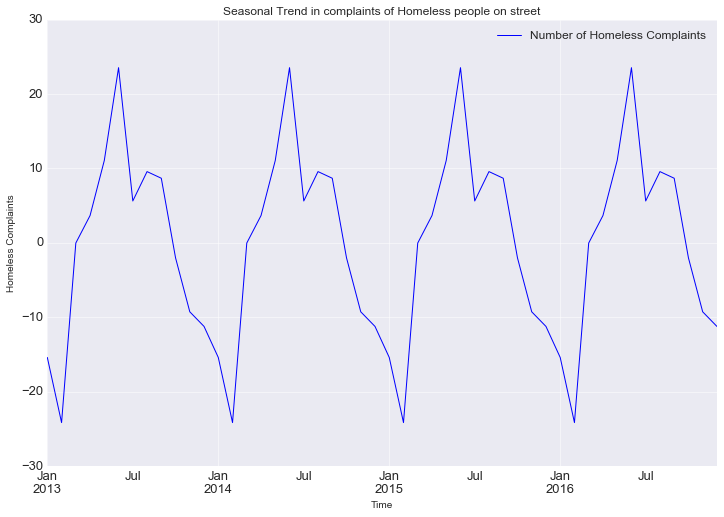

In [43]:
res = sm.tsa.seasonal_decompose(homeless311_timerseries.dropna())
res.seasonal.plot(figsize=(12,8), fontsize= 13)
pl.ylabel('Homeless Complaints')
pl.xlabel('Time')
pl.title('Seasonal Trend in complaints of Homeless people on street')

# Complaints are increasing during summers, also the number of homless people are increasing

In [67]:
shelter_scorecard = pd.read_csv("../Data_vys217/Shelter_Repair_Scorecard.csv")

In [72]:
shelter_scorecard.dtypes

Month                                     object
DHS_Bld_ID                                 int64
Shelter_Name_All                          object
Landlord                                  object
Borough                                   object
Facility_Type                             object
Capacity                                   int64
HighPriority_Closed_Monthly_DOB            int64
HighPriority_New_Monthly_DOB               int64
HighPriority_Open_Monthly_DOB              int64
HighPriority_Closed_Monthly_HPD            int64
HighPriority_New_Monthly_HPD               int64
HighPriority_Open_Monthly_HPD              int64
HighPriority_Closed_Monthly_FDNY           int64
HighPriority_New_Monthly_FDNY              int64
HighPriority_Open_Monthly_FDNY             int64
HighPriority_Closed_Monthly_DOHMH          int64
HighPriority_New_Monthly_DOHMH             int64
HighPriority_Open_Monthly_DOHMH            int64
MediumPriority_Closed_Monthly_DOB          int64
MediumPriority_New_M

In [45]:
# homeless15_16[homeless15_16['Created Date'].isnull()]
homeless[homeless['Created Date'].isnull()]

,Created Date,Complaint Type,Latitude,Longitude,date


In [46]:
# homeless15_16[homeless15_16['Complaint Type'].isnull()]
homeless[homeless['Complaint Type'].isnull()]

,Created Date,Complaint Type,Latitude,Longitude,date


In [47]:
# homeless15_16.dropna(inplace= True)
homeless.dropna(inplace=True)

In [48]:
# homeless15_16.reset_index(inplace=True)
homeless.reset_index(inplace=True)

In [49]:
# homeless15_16.drop(['index'], axis= 1, inplace=True)
homeless.drop(['index'], axis= 1, inplace=True)

In [50]:
homeless['Created Date'].describe()

count                   65975
unique                  65858
top       2016-08-06 08:31:48
freq                        3
first     2013-01-01 12:41:39
last      2016-12-02 01:46:39
Name: Created Date, dtype: object

In [51]:
homeless.to_csv('C:\Users\Vishwajeet\Documents\Python Scripts\Homeless\VYS217\Data_vys217\DHS\Intermittent\Homeless311_13to16.csv')

In [52]:
zips = gp.read_file('C:\Users\Vishwajeet\Documents\Python Scripts\Homeless\VYS217\Data_vys217\Crime\intermittent\Crime_Zipcode_old\ZIP_CODE_040114\ZIP_CODE_040114.shp')

In [53]:
zips

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
0,2.269930e+07,0,Queens,081,18681.0,Jamaica,0.0,0.0,NY,36,http://www.usps.com/,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,2.963100e+07,0,Kings,047,62426.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,4.197210e+07,0,Kings,047,83866.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,2.369863e+07,0,Kings,047,56527.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,3.686880e+07,0,Kings,047,72280.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,3.940860e+07,0,Kings,047,106132.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11226,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,4.200274e+07,0,Kings,047,92561.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11219,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,4.788702e+07,0,Kings,047,67067.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11210,"POLYGON ((995796.0097044706 171110.0666224659,..."
8,4.992670e+07,0,Kings,047,80857.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11230,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,4.355518e+07,0,Kings,047,77354.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11204,"POLYGON ((989500.1699339747 170730.1687602103,..."


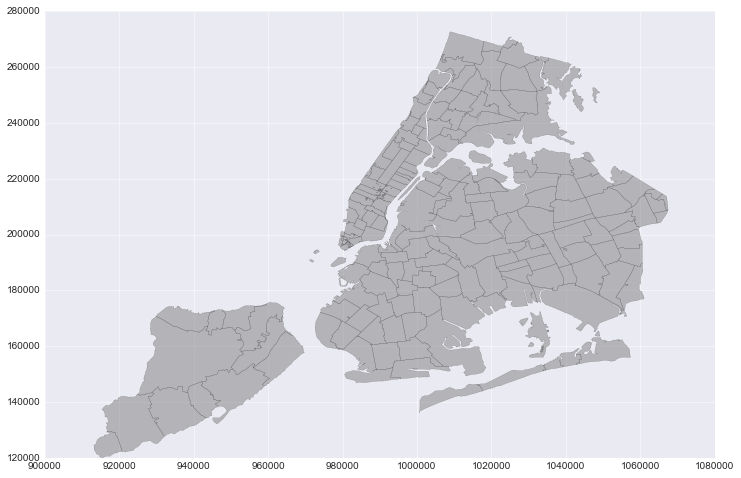

In [56]:
fig, ax = pl.subplots(1, figsize = (12,8))
zips.plot(ax=ax, color = 'grey', linewidth=0.1)